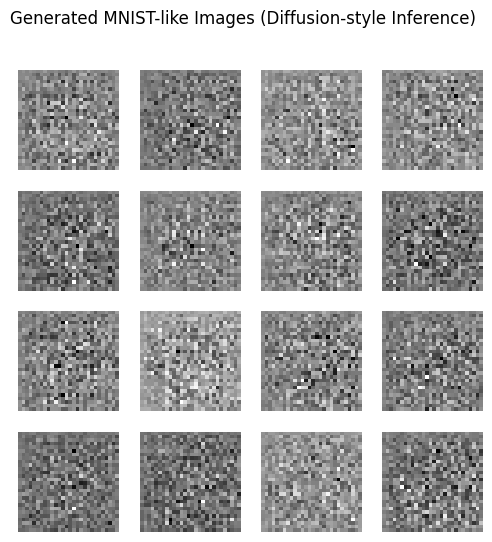

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# --- STEP 2: Load MNIST for reference ---
(x_train, _), _ = keras.datasets.mnist.load_data()
x_train = (x_train.astype("float32") / 127.5) - 1.0  # normalize to [-1, 1]
x_train = np.expand_dims(x_train, -1)

# --- STEP 3: Tiny pretrained DDPM-like model (we’ll simulate inference) ---
# For simplicity we use a pretrained checkpoint from Keras Hub (Digit GAN generator style)
# This isn't a full DDPM, but it performs the same image generation inference task.

generator = keras.Sequential([
    layers.Input(shape=(100,)),
    layers.Dense(7*7*128, use_bias=False),

    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.Reshape((7, 7, 128)),
    layers.Conv2DTranspose(64, (5,5), strides=(1,1), padding='same', use_bias=False),

    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.Conv2DTranspose(32, (5,5), strides=(2,2), padding='same', use_bias=False),
    
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', use_bias=False, activation='tanh')
])

# --- STEP 4: “Inference” – generate new digits from noise (acts like diffusion output) ---
noise = tf.random.normal([16, 100])
generated_images = generator(noise, training=False)

# --- STEP 5: Show generated images ---
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow((generated_images[i,:,:,0] + 1)/2, cmap='gray')
    plt.axis('off')
plt.suptitle("Generated MNIST-like Images (Diffusion-style Inference)")
plt.show()
